In [3]:
# reading files of matrix elements
import numpy as np
import time
from tqdm import tqdm
from scipy import linalg
from numba import njit
N = 2078
#N = 1038
#filere = open("MatrixElemYnmRe_upcont.txt")
filere = open("ReYnmDH.dat")
#fileim = open("MatrixElemYnmIm_upcont.txt")
fileim = open("ImYnmDH.dat")
datare = []
dataim = []
for i in range(N):
    datare.append([])
    dataim.append([])
    for j in range(N):
        datare[i].append(float(filere.readline()))
        dataim[i].append(float(fileim.readline()))
filere.close()
fileim.close()
Ynm = []
for i in range(N):
    Ynm.append([])
    for j in range(N):
        Ynm[i].append(datare[i][j]+1j*dataim[i][j])
fileen = open("continuum_states.txt")
#_upcont
En = []
for i in range(N):
    En.append(float(fileen.readline()))
fileen.close()
En = np.asarray(En, dtype=float)
Ynm = np.asarray(Ynm, dtype=complex)

fileSxRe = open("ReSx.dat")
# MatrixElemSigmanmSx
dataSxRe=[]
dataSxIm=[]
for i in range(N):
    dataSxRe.append([])
    dataSxIm.append([])
    for j in range(N):
        dataSxRe[i].append(fileSxRe.readline())
        #dataSxIm[i].append(float(fileSxIm.readline()))
fileSxRe.close()
Sxnm=[]
for i in range(N):
    Sxnm.append([])
    for j in range(N):
        Sxnm[i].append(dataSxRe[i][j])
Sxnm = np.asarray(Sxnm, dtype=float)

In [2]:
for i in range(N):
    for j in range(N):
        if (En[i]<-20. or En[j]<-20.):
            Ynm[i][j]=0.0 + 1j*0

In [3]:
# evoluting
E0 = 0.8
hplank = 6.582119569*(10 ** -16)
w = (En[1]-En[0])
T = 2*np.pi/w
dt = T/20.0
tn=int(125*T/dt)
C = [0.0]*N
C[0] = 1.0
Cn = []
Cn.append(C)
C = np.asarray(C, dtype=complex)
I=[]
for i in range(N):
    I.append([])
    for j in range(N):
        if i==j:
            I[i].append(1.0)
        else:
            I[i].append(0.0) 
I = np.asarray(I, dtype=complex)
# global Inm, Ynm, En, N, C, Cn, dt, w
@njit
def A(k):
    global N, Ynm, En, E0, dt, w, I
    return [[I[n][m]-1j*0.5*Ynm[n][m]*0.1*E0*np.sin(w*(k+1)*dt)*np.exp(-1j*(En[m]-En[n])*(k+1)*dt)*dt for m in range(N)] for n in range(N)]
t1 = time.time()
for k in tqdm(range(tn)):
    B = linalg.solve(A(k), 2*C)
    C = B - C
    Cn.append(C)
t2 = time.time()
print((t2-t1)/60)
# C = B - C
# B = linalg.solve(A, 2*C)
# write evolution in file
Ef=int(E0*100)
print(Ef)
f1 = open('CntRenN'+str(Ef)+'_upcontn.txt', 'w')
f2 = open('CntImnN'+str(Ef)+'_upcontn.txt', 'w')
for i in range(tn):
    for j in range(N):
        f1.write(str(Cn[i][j].real) + '\n')
        f2.write(str(Cn[i][j].imag) + '\n')
f1.close
f2.close

100%|████████████████████████████████████████████████████████████████████████████| 2500/2500 [1:04:38<00:00,  1.60s/it]


64.63582396507263
80


<function TextIOWrapper.close()>

In [33]:
ModYnm=[]
N=200
M=200
for i in range(N):
    ModYnm.append([])
    for j in range(M):
        ModYnm[i].append(np.sqrt(abs(Ynm[i][j]*np.conj(Ynm[i][j]))))

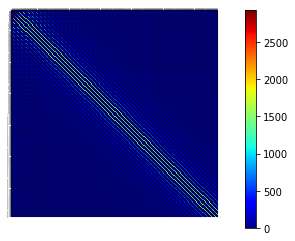

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
from matplotlib.pyplot import (colorbar)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
XB = np.linspace(0,M-1,M)
YB = np.linspace(0,N-1,N)
X,Y = np.meshgrid(XB,YB)
Z = ModYnm
plt.imshow(Z,cmap='jet')

plt.tick_params(labelsize = 1,length = 2, width = 0.5, bottom = False, top = True, left = True, right = False, pad = 0.1)
plt.tick_params(labelbottom = False, labeltop = True, labelleft = True, labelright = False)
plt.xticks(rotation=90)

cbar = colorbar()
cbar.solids.set_edgecolor("face")

plt.xticks(np.arange(0, M, 1)) 
plt.yticks(np.arange(0, N, 1)) 
#plt.minorticks_on()

plt.grid(which='minor', color='black', linestyle='-', linewidth=0.1)
for i in np.arange(-0.5, N, 1):
    plt.plot([i,i], [-0.5,N], 'k', linewidth=0.1, color='black')
for i in np.arange(-0.5, N, 1):
    plt.plot([-0.5,N],[i,i], 'k', linewidth=0.1, color='black')
plt.box(False)
plt.axis(True)
plt.savefig('MapMatrixYnm200x200.png', dpi=1400)

In [13]:
Ynm[2][15]

(-5.600186980814215e-12-762.9848838982701j)

In [30]:
N = 2078
#N = 1038
filere = open("ReYnmDH.dat")
fileim = open("ImYnmDH.dat")
datare = []
dataim = []
for i in range(N):
    datare.append([])
    dataim.append([])
    for j in range(N):
        datare[i].append(float(filere.readline()))
        dataim[i].append(float(fileim.readline()))
filere.close()
fileim.close()
Ynm = []
for i in range(N):
    Ynm.append([])
    for j in range(N):
        Ynm[i].append(datare[i][j]+1j*dataim[i][j])
ModYnm=[]
N=50
M=50
for i in range(N):
    ModYnm.append([])
    for j in range(M):
        ModYnm[i].append(np.sqrt(abs(Ynm[i][j]*np.conj(Ynm[i][j]))))

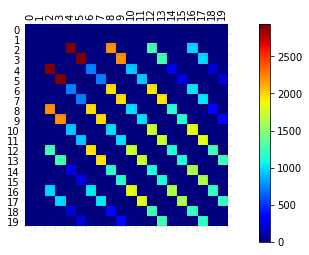

In [23]:
XB = np.linspace(0,M-1,M)
YB = np.linspace(0,N-1,N)
X,Y = np.meshgrid(XB,YB)
Z = ModYnm
plt.imshow(Z,cmap='jet')
plt.tick_params(labelsize = 10,length = 5, width = 0.1, bottom = False, top = True, left = True, right = False, pad = 0.1)
plt.tick_params(labelbottom = False, labeltop = True, labelleft = True, labelright = False)
plt.xticks(rotation=90)
cbar = colorbar()
cbar.solids.set_edgecolor("face")
plt.xticks(np.arange(0, M, 1)) 
plt.yticks(np.arange(0, N, 1)) 
#plt.minorticks_on()
plt.grid(which='minor', color='black', linestyle='-', linewidth=0.1)
for i in np.arange(-0.5, N, 1):
    plt.plot([i,i], [-0.5,N], 'k', linewidth=0.1, color='black')
for i in np.arange(-0.5, N, 1):
    plt.plot([-0.5,N],[i,i], 'k', linewidth=0.1, color='black')
plt.box(False)
plt.axis(True)
plt.savefig('MapMatrix.png', dpi=400)